In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


In [3]:
train_df = pd.read_csv("../data/raw/train.csv")
test_df = pd.read_csv("../data/raw/test.csv")
train_df.head()

id             date   price  bedrooms  bathrooms  sqft_living  \
0  9117000170  20150505T000000  268643         4       2.25         1810   
1  6700390210  20140708T000000  245000         3       2.50         1600   
2  7212660540  20150115T000000  200000         4       2.50         1720   
3  8562780200  20150427T000000  352499         2       2.25         1240   
4  7760400350  20141205T000000  232000         3       2.00         1280   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      9240     2.0           0     0  ...      7        1810              0   
1      2788     2.0           0     0  ...      7        1600              0   
2      8638     2.0           0     0  ...      8        1720              0   
3       705     2.0           0     0  ...      7        1150             90   
4     13356     1.0           0     0  ...      7        1280              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1961             0    98055  47.4362 -122.187           1660   
1      1992             0    98031  47.4034 -122.187           1720   
2      1994             0    98003  47.2704 -122.313           1870   
3      2009             0    98027  47.5321 -122.073           1240   
4      1994             0    98042  47.3715 -122.074           1590   

   sqft_lot15  
0        9240  
1        3605  
2        7455  
3         750  
4        8071  

[5 rows x 21 columns]

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16209 entries, 0 to 16208
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             16209 non-null  int64  
 1   date           16209 non-null  object 
 2   price          16209 non-null  int64  
 3   bedrooms       16209 non-null  int64  
 4   bathrooms      16209 non-null  float64
 5   sqft_living    16209 non-null  int64  
 6   sqft_lot       16209 non-null  int64  
 7   floors         16209 non-null  float64
 8   waterfront     16209 non-null  int64  
 9   view           16209 non-null  int64  
 10  condition      16209 non-null  int64  
 11  grade          16209 non-null  int64  
 12  sqft_above     16209 non-null  int64  
 13  sqft_basement  16209 non-null  int64  
 14  yr_built       16209 non-null  int64  
 15  yr_renovated   16209 non-null  int64  
 16  zipcode        16209 non-null  int64  
 17  lat            16209 non-null  float64
 18  long  

In [5]:
train_df.describe()

id         price     bedrooms     bathrooms   sqft_living  \
count  1.620900e+04  1.620900e+04  16209.00000  16209.000000  16209.000000   
mean   4.575771e+09  5.374703e+05      3.36782      2.113054   2073.274601   
std    2.874661e+09  3.603036e+05      0.93327      0.765242    907.009491   
min    1.000102e+06  7.500000e+04      0.00000      0.000000    290.000000   
25%    2.123049e+09  3.200000e+05      3.00000      1.500000   1430.000000   
50%    3.904950e+09  4.500000e+05      3.00000      2.250000   1910.000000   
75%    7.304301e+09  6.400000e+05      4.00000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.00000      8.000000  12050.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  1.620900e+04  16209.000000  16209.000000  16209.000000  16209.000000   
mean   1.486767e+04      1.498828      0.006971      0.234253      3.407860   
std    3.882570e+04      0.543032      0.083206      0.763152      0.651553   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.004000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.599000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.063100e+04      2.000000      0.000000      0.000000      4.000000   
max    1.164794e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  16209.000000  16209.000000   16209.000000  16209.000000  16209.000000   
mean       7.652971   1784.754396     288.520205   1971.152755     82.738108   
std        1.171050    821.820844     438.598910     29.372698    397.861148   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1200.000000       0.000000   1952.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2200.000000     560.000000   1997.000000      0.000000   
max       13.000000   8860.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  16209.000000  16209.000000  16209.000000   16209.000000   16209.000000  
mean   98077.974767     47.560707   -122.214003    1983.152261   12735.572707  
std       53.355282      0.138340      0.140093     681.905161   26933.162012  
min    98001.000000     47.159300   -122.519000     399.000000     651.000000  
25%    98033.000000     47.472500   -122.328000    1480.000000    5098.000000  
50%    98065.000000     47.572400   -122.230000    1840.000000    7620.000000  
75%    98117.000000     47.678200   -122.125000    2360.000000   10053.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

In [6]:
train_df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
#Distribution of price
plt.figure(figsize=(7,4))
sns.histplot(train_df['price'], bins=60, kde=True)
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()


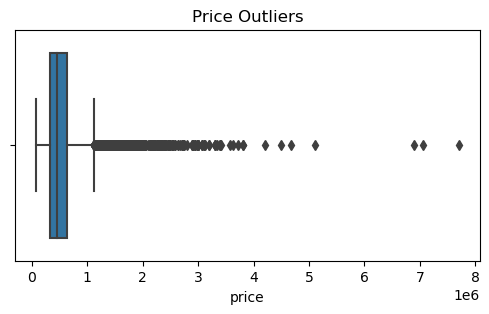

In [8]:
#boxplot - to understand outliers
plt.figure(figsize=(6,3))
sns.boxplot(x=train_df['price'])
plt.title("Price Outliers")
plt.show()


univariate analysis


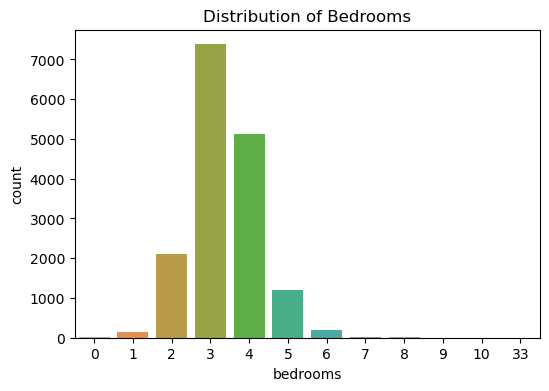

In [9]:
#bedrooms
plt.figure(figsize=(6,4))
sns.countplot(x='bedrooms', data=train_df)
plt.title("Distribution of Bedrooms")
plt.show()


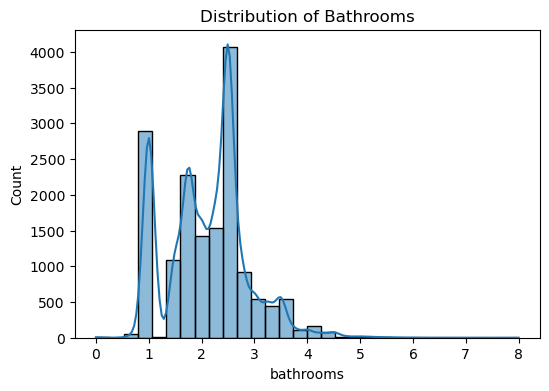

In [10]:
#bathrooms
plt.figure(figsize=(6,4))
sns.histplot(train_df['bathrooms'], bins=30, kde=True)
plt.title("Distribution of Bathrooms")
plt.show()


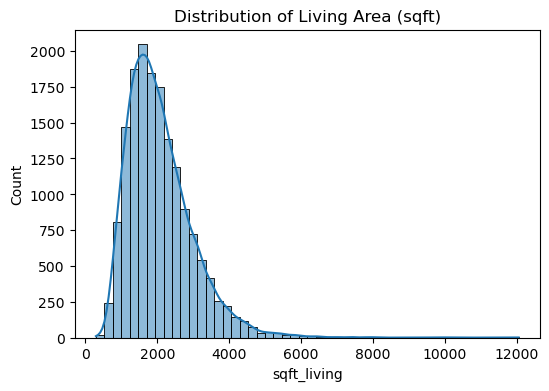

In [11]:
#Living Area (sqft_living)
plt.figure(figsize=(6,4))
sns.histplot(train_df['sqft_living'], bins=50, kde=True)
plt.title("Distribution of Living Area (sqft)")
plt.show()


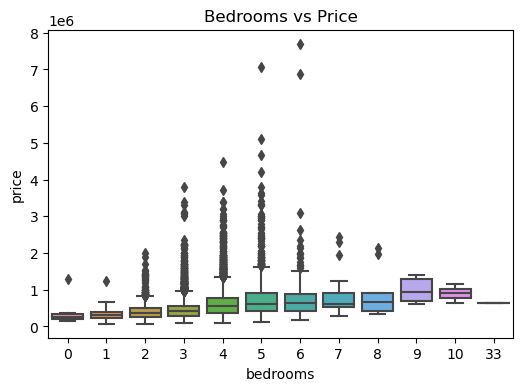

In [12]:
#bedroom vs price
plt.figure(figsize=(6,4))
sns.boxplot(x='bedrooms', y='price', data=train_df)
plt.title("Bedrooms vs Price")
plt.show()


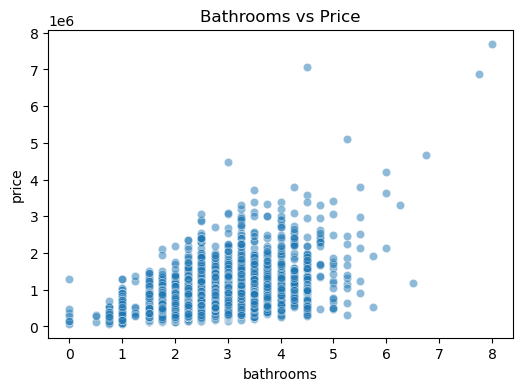

In [13]:
#bathrooms vs price
plt.figure(figsize=(6,4))
sns.scatterplot(x='bathrooms', y='price', data=train_df, alpha=0.5)
plt.title("Bathrooms vs Price")
plt.show()


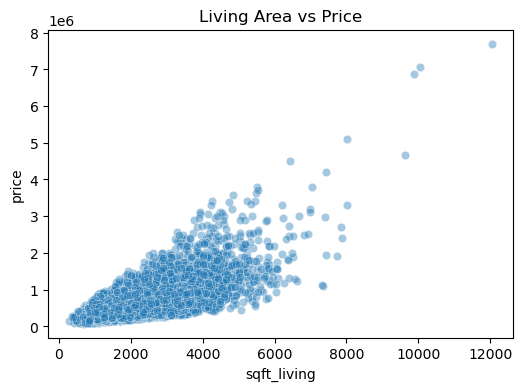

In [14]:
#sqft_living vs Price
plt.figure(figsize=(6,4))
sns.scatterplot(x='sqft_living', y='price', data=train_df, alpha=0.4)
plt.title("Living Area vs Price")
plt.show()


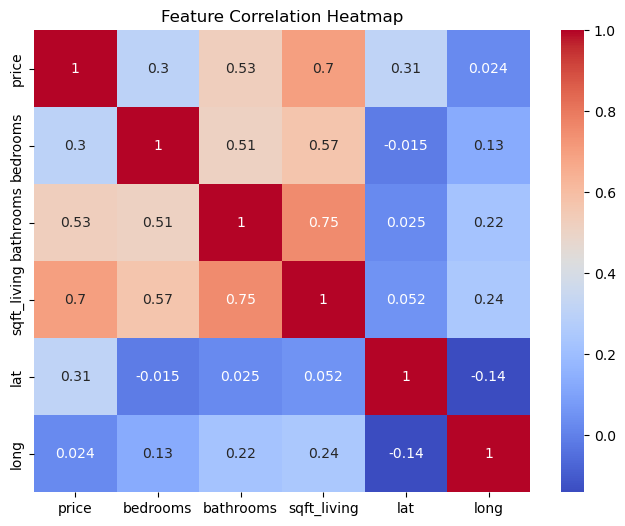

In [15]:
#Correlation Analysis
plt.figure(figsize=(8,6))
sns.heatmap(
    train_df[['price','bedrooms','bathrooms','sqft_living','lat','long']].corr(),
    annot=True, cmap='coolwarm'
)
plt.title("Feature Correlation Heatmap")
plt.show()


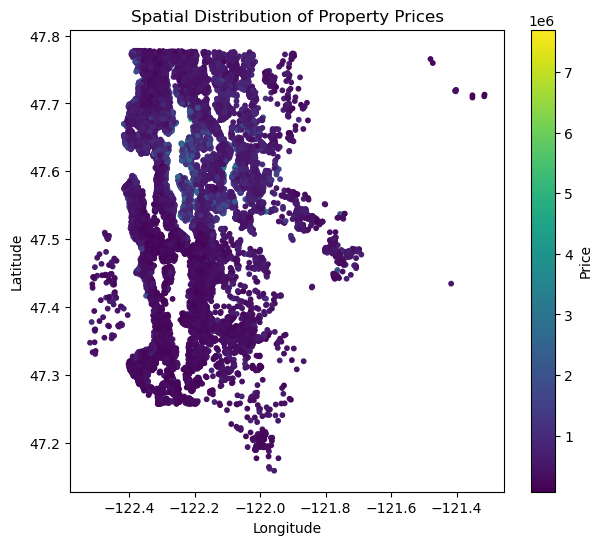

In [16]:
#Property Locations Colored by Price
plt.figure(figsize=(7,6))
plt.scatter(
    train_df['long'], train_df['lat'],
    c=train_df['price'],
    cmap='viridis',
    s=10
)
plt.colorbar(label="Price")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Spatial Distribution of Property Prices")
plt.show()


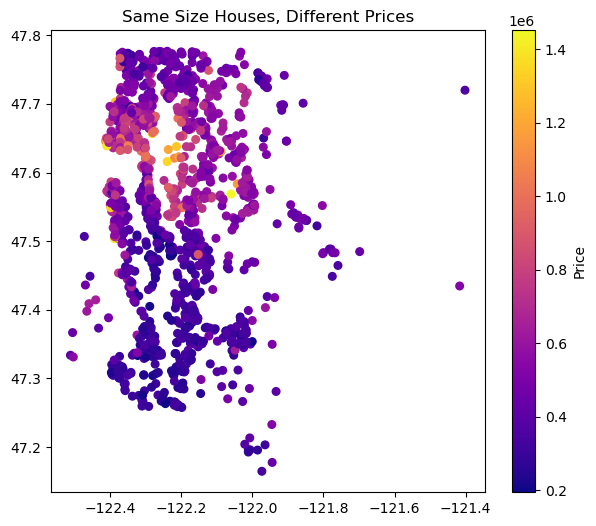

In [17]:
sample = train_df[(train_df['sqft_living'] > 2000) & (train_df['sqft_living'] < 2200)]

plt.figure(figsize=(7,6))
plt.scatter(
    sample['long'], sample['lat'],
    c=sample['price'],
    cmap='plasma',
    s=30
)
plt.colorbar(label="Price")
plt.title("Same Size Houses, Different Prices")
plt.show()


In [18]:
eda_summary = pd.DataFrame({
    "Feature": ['bedrooms', 'bathrooms', 'sqft_living', 'lat', 'long'],
    "Correlation_with_Price": [
        train_df['price'].corr(train_df['bedrooms']),
        train_df['price'].corr(train_df['bathrooms']),
        train_df['price'].corr(train_df['sqft_living']),
        train_df['price'].corr(train_df['lat']),
        train_df['price'].corr(train_df['long'])
    ]
})

eda_summary


Feature  Correlation_with_Price
0     bedrooms                0.304454
1    bathrooms                0.525487
2  sqft_living                0.700933
3          lat                0.310008
4         long                0.024279

In [19]:
print("train samples ", len(train_df))
print("test samples ",len(test_df))

train samples  16209
test samples  5404


In [21]:
import pandas as pd
import json

# Load failed IDs
with open("../failed_train.json") as f:
    failed_train = set(json.load(f))

with open("../failed_test.json") as f:
    failed_test = set(json.load(f))

# Load original data
train_df = pd.read_csv("../data/raw/train.csv")
test_df  = pd.read_csv("../data/raw/test.csv")

print("Before cleaning:")
print("Train:", len(train_df), "Test:", len(test_df))

# Drop failed samples
train_df = train_df[~train_df["id"].isin(failed_train)]
test_df  = test_df[~test_df["id"].isin(failed_test)]

print("\nAfter cleaning:")
print("Train:", len(train_df), "Test:", len(test_df))

# Save cleaned data
train_df.to_csv("../data/processed/train_clean.csv", index=False)
test_df.to_csv("../data/processed/test_clean.csv", index=False)


Before cleaning:
Train: 16209 Test: 5404

After cleaning:
Train: 16207 Test: 5393


Image EDA


In [22]:
import os
import random
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image


In [24]:
train_df = pd.read_csv("../data/processed/train_clean.csv")

IMG_DIR = "../data/images/train"

print("Total training samples:", len(train_df))


Total training samples: 16207


In [25]:
def show_random_images(df, img_dir, n=9):
    samples = df.sample(n)

    plt.figure(figsize=(10, 10))
    for i, (_, row) in enumerate(samples.iterrows()):
        img_path = os.path.join(img_dir, f"{row['id']}.png")
        img = Image.open(img_path)

        plt.subplot(3, 3, i + 1)
        plt.imshow(img)
        plt.axis("off")
        plt.title(f"ID: {row['id']}")

    plt.tight_layout()
    plt.show()

show_random_images(train_df, IMG_DIR)


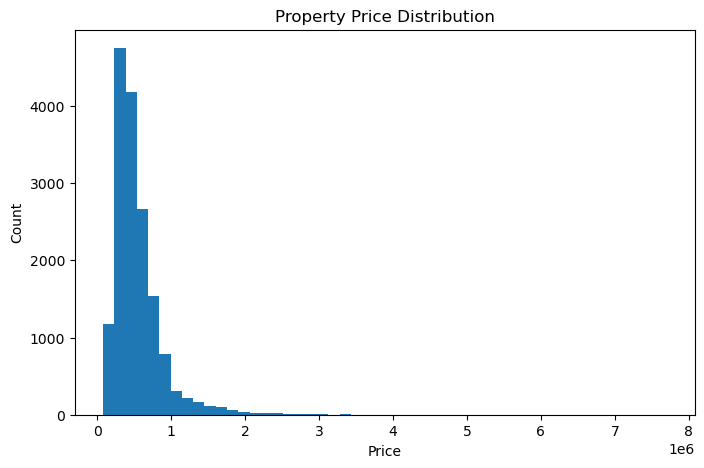

In [26]:
plt.figure(figsize=(8,5))
plt.hist(train_df["price"], bins=50)
plt.xlabel("Price")
plt.ylabel("Count")
plt.title("Property Price Distribution")
plt.show()


In [27]:
low_thresh  = train_df["price"].quantile(0.1)
high_thresh = train_df["price"].quantile(0.9)

cheap_df = train_df[train_df["price"] <= low_thresh]
exp_df   = train_df[train_df["price"] >= high_thresh]

print("Cheap samples:", len(cheap_df))
print("Expensive samples:", len(exp_df))


Cheap samples: 1654
Expensive samples: 1621


In [28]:
show_random_images(cheap_df, IMG_DIR, n=6)


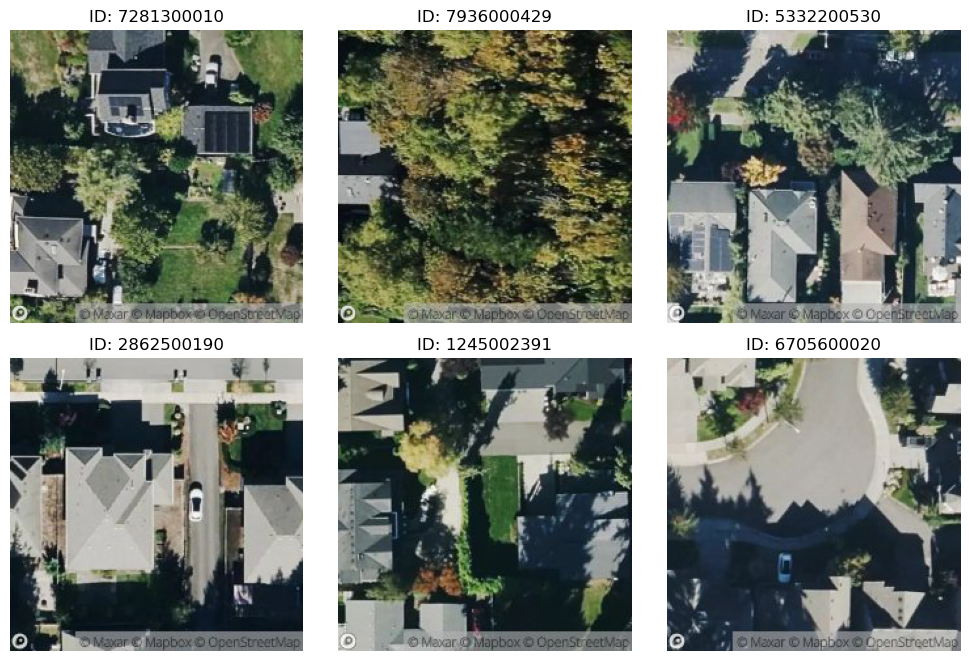

In [29]:
show_random_images(exp_df, IMG_DIR, n=6)


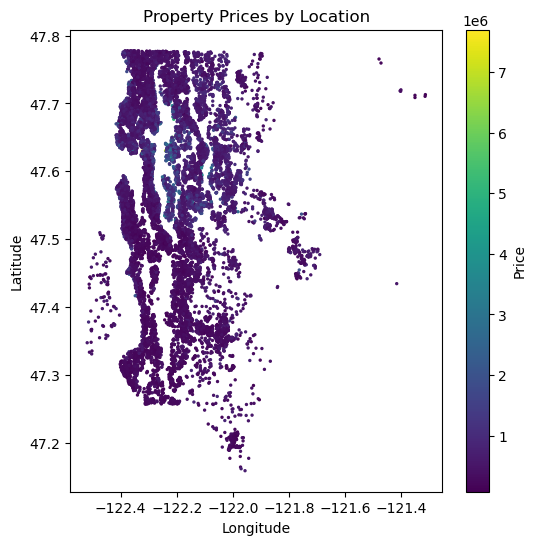

In [31]:
plt.figure(figsize=(6,6))
plt.scatter(train_df["long"], train_df["lat"], 
            c=train_df["price"], cmap="viridis", s=2)
plt.colorbar(label="Price")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Property Prices by Location")
plt.show()
